# Import essential libraries

In [1]:
# File and data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import ConfusionMatrixDisplay

# Model selection and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression,
    HuberRegressor,
    RANSACRegressor
)
from sklearn.feature_selection import RFE

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    mean_squared_error
)

# Google Colab file import
from google.colab import files


In [2]:
titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')
df = pd.read_csv('/content/mp1_lr_dataset_ai4032.csv')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("Titanic-Dataset.csv")
# Check the general structure and missing values
df.info()

# Display basic statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


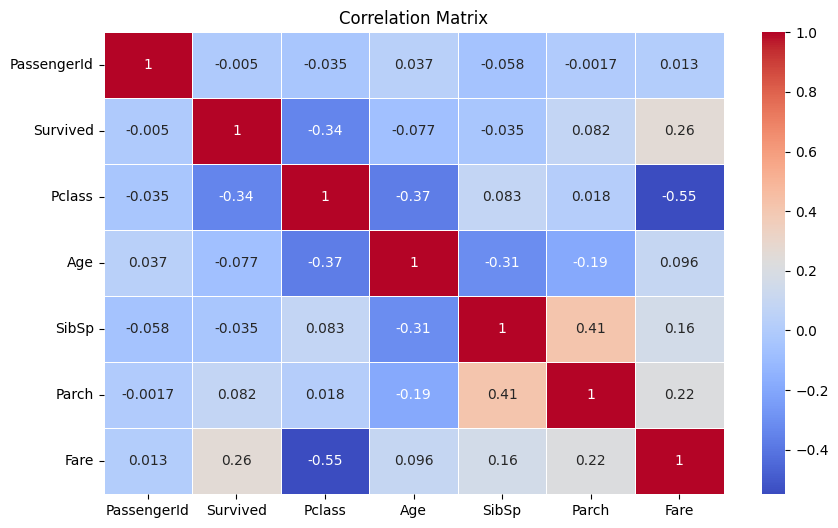

In [5]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


🎯 بررسی تأثیر جنسیت (Sex) بر بقا (Survived)


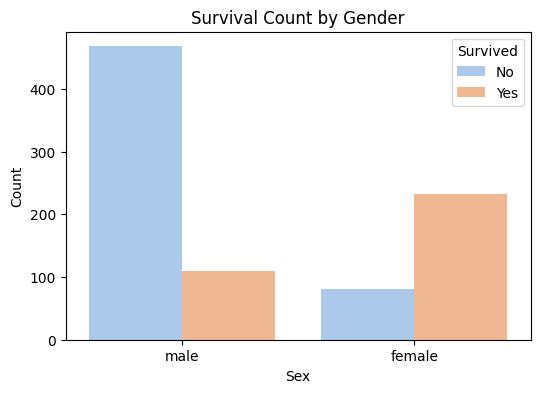

In [6]:
# Plot count of survivors by gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


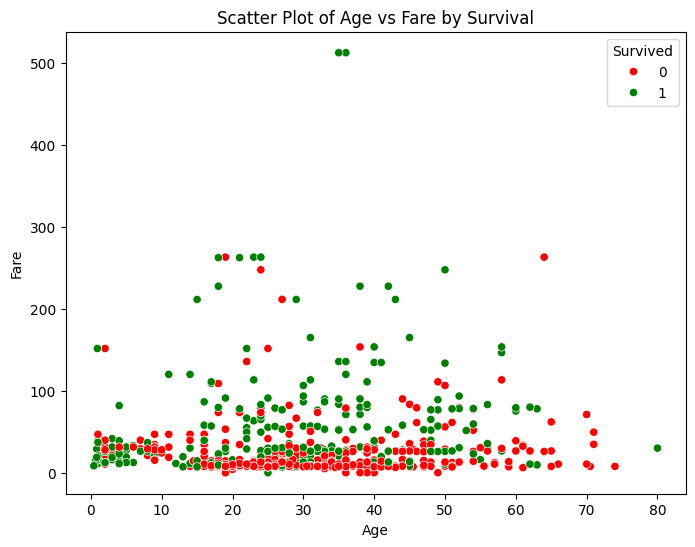

In [7]:

# Scatter plot: Age vs Fare, colored by Survived
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Fare',
    hue='Survived',
    palette={0: 'red', 1: 'green'}
)
plt.title("Scatter Plot of Age vs Fare by Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived", loc='best')  # حذف labels دستی
plt.show()


<Figure size 800x600 with 0 Axes>

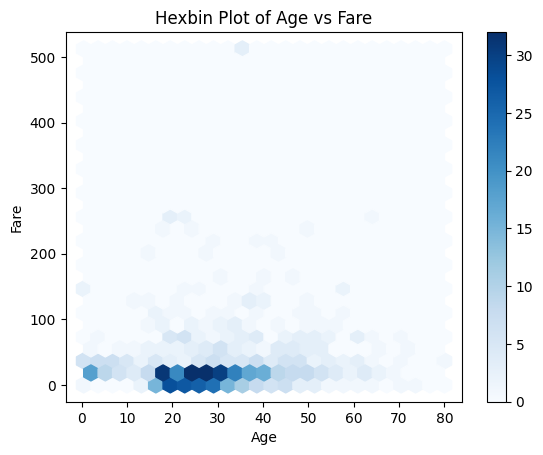

In [8]:
# Hexbin plot (requires dropna)
plt.figure(figsize=(8,6))
df.dropna(subset=['Age', 'Fare']).plot.hexbin(
    x='Age', y='Fare', gridsize=25, cmap='Blues', sharex=False, sharey=False)
plt.title("Hexbin Plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


✅ کد مرحله اول: Scatter Plot با Plotly

In [9]:

# Drop rows with missing Age or Fare
filtered_df = df.dropna(subset=['Age', 'Fare'])

# Plotly scatter plot
fig = px.scatter(
    filtered_df,
    x="Age",
    y="Fare",
    color="Survived",
    color_continuous_scale=["red", "green"],
    labels={"Survived": "Survived"},
    title="Scatter Plot of Age vs Fare (Colored by Survival)",
    hover_data=["Sex", "Pclass"]
)
fig.show()


✅ کد مرحله دوم: بررسی درصد بازماندگان مرد و زن


In [10]:
# تعداد بازماندگان از هر جنس
survived_counts = df[df['Survived'] == 1]['Sex'].value_counts()
# کل افراد هر جنس
total_counts = df['Sex'].value_counts()

# درصد نجات‌یافتگان
survival_percent = (survived_counts / total_counts) * 100
print(survival_percent)


Sex
female    74.203822
male      18.890815
Name: count, dtype: float64


✅ کد نمایش با countplot:


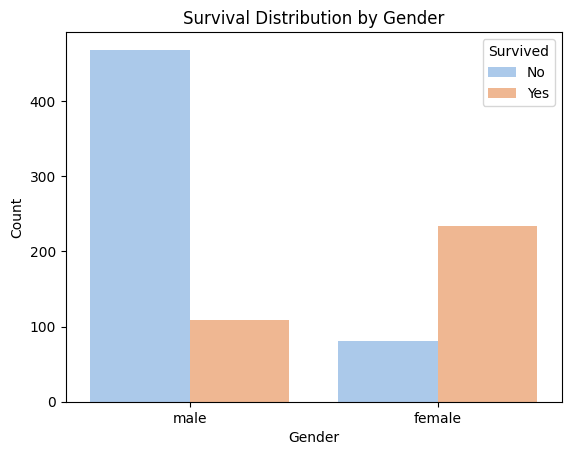

In [11]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')
plt.title("Survival Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


 مرحله ۱: ساخت ستون FamilySize


<ipython-input-12-f11fd62120e2>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




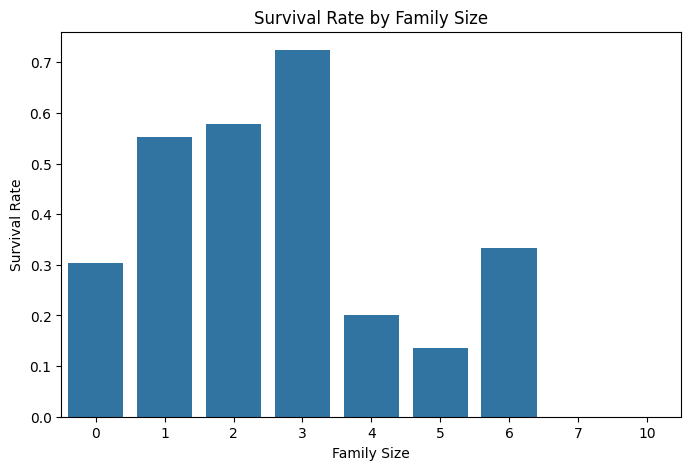

In [12]:
# Create FamilySize column
df["FamilySize"] = df["SibSp"] + df["Parch"]

# Plot survival by family size
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="FamilySize", y="Survived", ci=None)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()


مرحله ۲: بررسی تنها سفر کردن (IsAlone)

<ipython-input-13-e369b8582da4>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




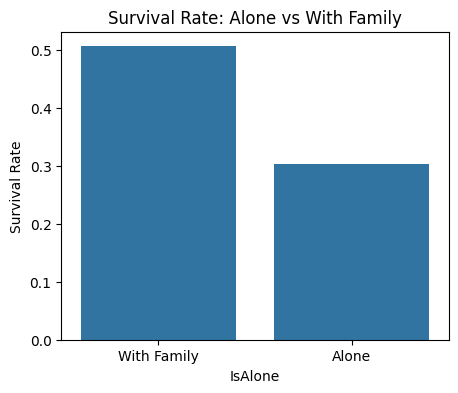

In [13]:
# Create IsAlone column
df["IsAlone"] = (df["FamilySize"] == 0).astype(int)

# Compare survival rate of people alone vs not alone
plt.figure(figsize=(5,4))
sns.barplot(data=df, x="IsAlone", y="Survived", ci=None)
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.title("Survival Rate: Alone vs With Family")
plt.ylabel("Survival Rate")
plt.show()


مرحله ۳: تقسیم مسافران به گروه‌های سنی

<ipython-input-14-6565ac3b3bbf>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-14-6565ac3b3bbf>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




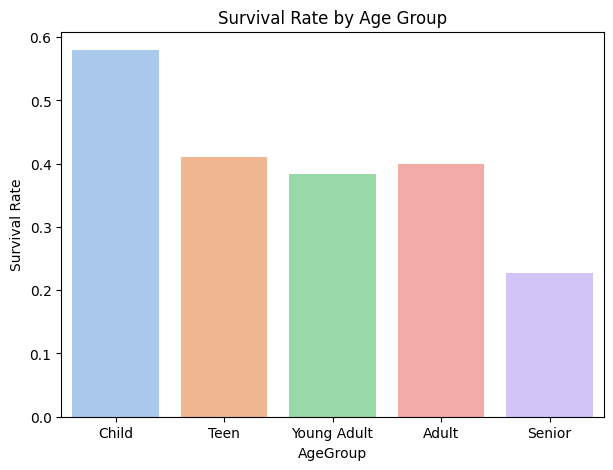

In [14]:
# Define age bins and labels
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Plot survival rate by age group
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="AgeGroup", y="Survived", ci=None, palette="pastel")
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.show()


بخش دوم پروژه: پیش‌پردازش داده‌ها

Final Optimized & Clean Version of Preprocessing Code

In [15]:
df = pd.read_csv("Titanic-Dataset.csv")  # یا هر اسم فایل دیگه
df.shape  # بررسی تعداد ردیف و ستون

(891, 12)

In [16]:
# Drop unnecessary columns only if they exist
columns_to_drop = ["Name", "Ticket", "Cabin", "PassengerId"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Convert 'Sex' column to numeric if it exists
if "Sex" in df.columns:
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Fill missing values in 'Age' with median
if "Age" in df.columns:
    df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill missing values in 'Fare' with median
if "Fare" in df.columns:
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Fill missing 'Embarked' with mode and apply one-hot encoding
if "Embarked" in df.columns:
    df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
    df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [18]:
# انتخاب متغیر هدف
y = df["Survived"]

# انتخاب ویژگی‌های ورودی (همه به جز Survived)
X = df.drop("Survived", axis=1)


# نمایش ابعاد داده‌ها
X.shape, y.shape


((891, 8), (891,))

891 نمونه داریم

8 ویژگی ورودی برای هر نمونه

In [19]:
# 1. تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. ساخت و آموزش مدل
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 3. پیش‌بینی روی داده تست
y_pred = model.predict(X_test)

# 4. ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", report)


Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [20]:
# ساخت DataFrame از ضرایب مدل
# نمایش ضرایب مدل به همراه نام ویژگی‌ها
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

# مرتب‌سازی بر اساس اهمیت
coefficients.sort_values(by="Coefficient", ascending=False, inplace=True)
coefficients


,Feature,Coefficient
1,Sex,2.590495
5,Fare,0.002579
2,Age,-0.030605
4,Parch,-0.108140
6,Embarked_Q,-0.113437
3,SibSp,-0.295471
7,Embarked_S,-0.399792
0,Pclass,-0.937896


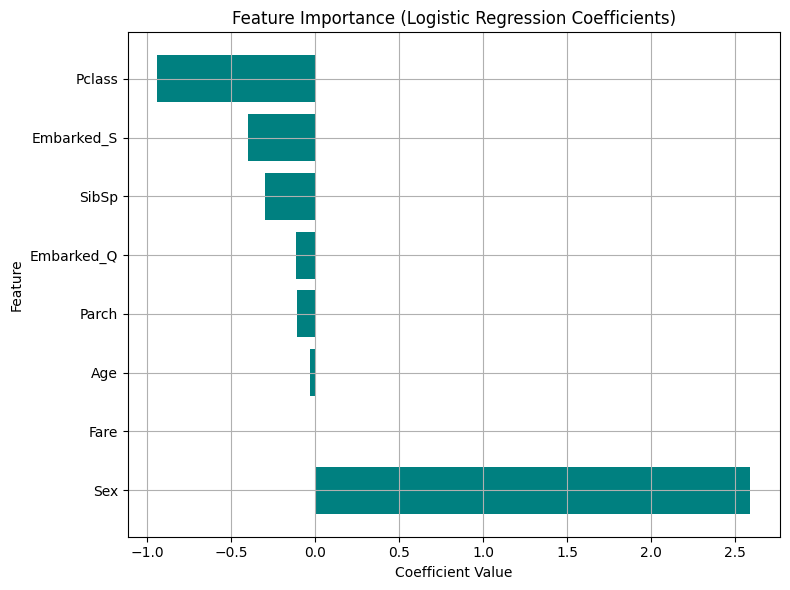

In [21]:
# Visualize feature importance (coefficients)

plt.figure(figsize=(8,6))
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color='teal')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.savefig("Feature_Coefficients.png")  # ذخیره تصویر برای استفاده در گزارش LaTeX
plt.show()


انتخاب ویژگی با Lasso Regression

In [23]:

# مقیاس‌بندی ویژگی‌ها برای بهتر کار کردن Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# مدل Logistic با پنالتی L1 (Lasso)
lasso = LogisticRegressionCV(
    Cs=10,
    cv=5,
    penalty='l1',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)
lasso.fit(X_scaled, y)

# استخراج ضرایب
lasso_coef = pd.Series(lasso.coef_[0], index=X.columns)
selected_features_lasso = lasso_coef[lasso_coef != 0].index.tolist()

print("ویژگی‌های انتخاب شده توسط Lasso:")
print(selected_features_lasso)


ویژگی‌های انتخاب شده توسط Lasso:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


RFE - Recursive Feature Elimination

این روش به‌صورت بازگشتی ویژگی‌هایی رو حذف می‌کنه که تأثیر کمتری دارن.



In [24]:

# استفاده از مدل پایه برای RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# نمایش ویژگی‌های انتخاب شده
selected_features_rfe = X.columns[rfe.support_].tolist()
print("ویژگی‌های انتخاب‌شده توسط RFE:")
print(selected_features_rfe)


ویژگی‌های انتخاب‌شده توسط RFE:
['Pclass', 'Sex', 'SibSp', 'Embarked_Q', 'Embarked_S']


آموزش مدل با ویژگی‌های Lasso

In [25]:

# ویژگی‌ها و هدف
X_lasso = X[selected_features_lasso]
y = df["Survived"]

# تقسیم داده‌ها
X_train_l, X_test_l, y_train, y_test = train_test_split(X_lasso, y, test_size=0.2, random_state=42)

# آموزش مدل
model_lasso = LogisticRegression(max_iter=1000)
model_lasso.fit(X_train_l, y_train)

# پیش‌بینی
y_pred_l = model_lasso.predict(X_test_l)

# ارزیابی
print("---- Lasso Features ----")
print("Accuracy:", accuracy_score(y_test, y_pred_l))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_l))
print("Classification Report:\n", classification_report(y_test, y_pred_l))


---- Lasso Features ----
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



آموزش مدل با ویژگی‌های RFE

In [26]:
# ویژگی‌ها و هدف
X_rfe = X[selected_features_rfe]

# تقسیم داده‌ها
X_train_r, X_test_r, _, _ = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# آموزش مدل
model_rfe = LogisticRegression(max_iter=1000)
model_rfe.fit(X_train_r, y_train)

# پیش‌بینی
y_pred_r = model_rfe.predict(X_test_r)

# ارزیابی
print("---- RFE Features ----")
print("Accuracy:", accuracy_score(y_test, y_pred_r))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_r))
print("Classification Report:\n", classification_report(y_test, y_pred_r))


---- RFE Features ----
Accuracy: 0.770949720670391
Confusion Matrix:
 [[82 23]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       105
           1       0.71      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



طبقه‌بندی متغیر هدف به ۳ کلاس:

Low Chance → شانس بقا پایین

Medium Chance → شانس بقا متوسط

High Chance → شانس بقا بالا

آموزش مدل Logistic Regression چندکلاسه روی این متغیر جدید

In [28]:

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Drop unnecessary columns if they exist
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Convert categorical features to numeric
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Fill missing values
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())
df.dropna(inplace=True)

# Define X and y
X = df.drop("Survived", axis=1)
y_binary = df["Survived"]

# Train logistic regression model to get probabilities
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y_binary)

# Get predicted probabilities of survival (class 1)
probs = logreg.predict_proba(X)[:, 1]

# Split into 3 classes: Low, Medium, High
bins = [0, 0.33, 0.66, 1]
labels = [0, 1, 2]  # 0=Low, 1=Medium, 2=High
y_multiclass = pd.cut(probs, bins=bins, labels=labels)

# Display sample count in each class
print("تعداد نمونه‌ها در کلاس‌های جدید:")
print(y_multiclass.value_counts())


تعداد نمونه‌ها در کلاس‌های جدید:
0    490
1    178
2    223
Name: count, dtype: int64


In [29]:


# Select features and target
X = df.drop(columns=["Survived"])
y_binary = df["Survived"]

# Train a binary logistic regression to get predicted probabilities
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y_binary)

# Predict probabilities for class 1 (survived)
survival_probs = logreg.predict_proba(X)[:, 1]

# Convert probabilities into 3 categories:
# 0 = Low (p < 0.33), 1 = Medium (0.33 ≤ p < 0.66), 2 = High (p ≥ 0.66)
def categorize_probability(p):
    if p < 0.33:
        return 0  # Low Chance
    elif p < 0.66:
        return 1  # Medium Chance
    else:
        return 2  # High Chance

y_multiclass = np.array([categorize_probability(p) for p in survival_probs])

# Display class distribution
unique, counts = np.unique(y_multiclass, return_counts=True)
print("Multiclass Target Distribution:")
for label, count in zip(unique, counts):
    print(f"Class {label} → {count} samples")

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

# Train a multiclass logistic regression model
multi_logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
multi_logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = multi_logreg.predict(X_test)

# Print classification results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Multiclass Target Distribution:
Class 0 → 490 samples
Class 1 → 178 samples
Class 2 → 223 samples


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



Confusion Matrix:
 [[90  1  0]
 [ 2 32  2]
 [ 0  2 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        91
           1       0.91      0.89      0.90        36
           2       0.96      0.96      0.96        52

    accuracy                           0.96       179
   macro avg       0.95      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179



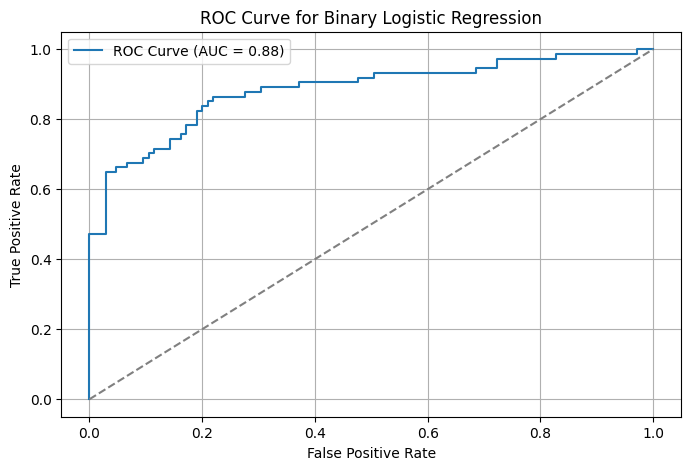

In [30]:
# Split binary data for evaluation
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train binary logistic regression
binary_model = LogisticRegression(max_iter=1000)
binary_model.fit(X_train_bin, y_train_bin)

# Get predicted probabilities for class 1 (survived)
y_probs_bin = binary_model.predict_proba(X_test_bin)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test_bin, y_probs_bin)
auc_score = roc_auc_score(y_test_bin, y_probs_bin)

# Plot ROC
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Binary Logistic Regression")
plt.legend()
plt.grid()
plt.show()


<ipython-input-31-9a8815b6a77e>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




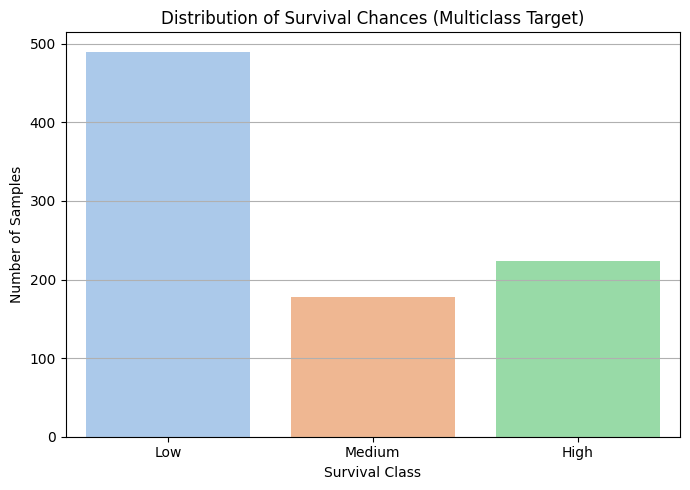

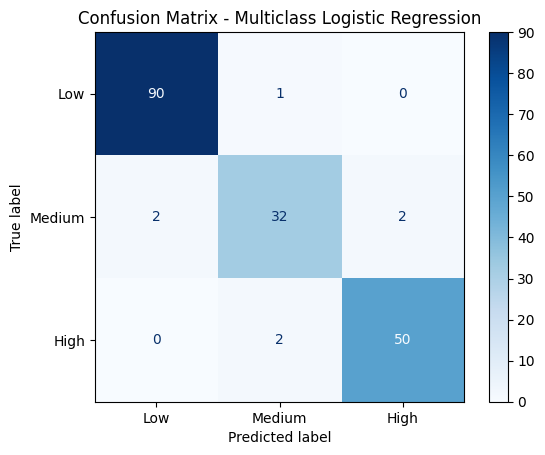

In [31]:

# داده‌های کلاس‌ها
class_counts = {0: 490, 1: 178, 2: 223}
labels = ["Low", "Medium", "High"]
values = [class_counts[i] for i in range(3)]

# رسم barplot برای توزیع کلاس‌ها
plt.figure(figsize=(7,5))
sns.barplot(x=labels, y=values, palette="pastel")
plt.title("Distribution of Survival Chances (Multiclass Target)")
plt.xlabel("Survival Class")
plt.ylabel("Number of Samples")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# داده‌های ماتریس آشفتگی
conf_matrix = np.array([[90, 1, 0],
                        [2, 32, 2],
                        [0, 2, 50]])

# رسم confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=["Low", "Medium", "High"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Multiclass Logistic Regression")
plt.grid(False)
plt.show()


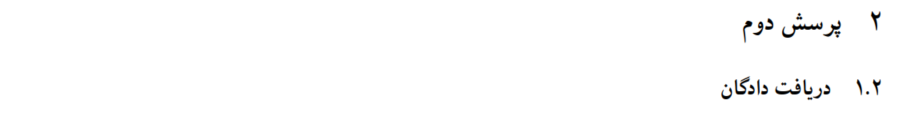

In [33]:
# بارگذاری فایل CSV
df_dadkan = pd.read_csv("mp1_lr_dataset_ai4032.csv")

# مشاهده‌ی ۵ سطر اول
df_dadkan.head()


,1,2,3,4,5,6,7,8,9,10,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,13,29,44,55,61,72,200,96,112,120,...,21680,21692,21697,21705,21711,21729,21742,21746,21763,21777
1,-3980,-3883,-3832,0,-3839,-3788,-3695,-3663,-3669,0,...,7130,7150,7117,7023,7064,0,7027,6929,6954,6867
2,-3959,-4058,-4131,-4033,-4009,-3941,-3996,-4071,-3971,-4021,...,-254,-296,-303,0,-327,-274,-358,-278,-346,-299


 ۲.۳.۲ تبدیل سطرها به آرایه‌ی ستونی با numpy.reshape

In [34]:
# فرض بر این است که داده‌ها در یک ستون هستند
array_column = df_dadkan.values.reshape(-1, 1)
array_column[:5]  # نمایش ۵ مورد اول


array([[13.],
       [29.],
       [44.],
       [55.],
       [61.]])

 ۲.۴.۲ رسم رنگی داده‌ها با matplotlib

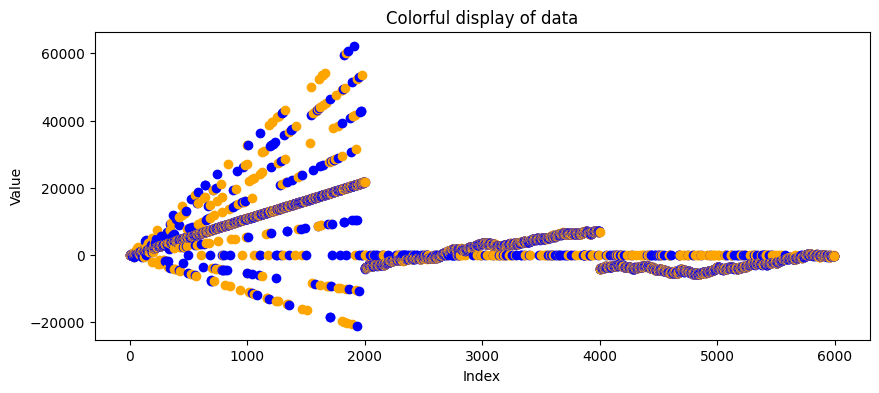

In [35]:
plt.figure(figsize=(10,4))
for i in range(len(array_column)):
    plt.scatter(i, array_column[i], c='blue' if i%2==0 else 'orange')

plt.title("Colorful display of data")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()


پاکسازی و پیش‌پردازش داده‌ها

In [36]:
# بارگذاری فایل CSV
df = pd.read_csv("mp1_lr_dataset_ai4032.csv")  # جایگزین با نام فایل واقعی

# بررسی وجود داده‌های گمشده
print("Missing values per column:")
print(df.isnull().sum())

# حذف یا جایگزینی داده‌های گمشده (در صورت نیاز)
df_cleaned = df.dropna()  # یا مثلا: df.fillna(method="ffill", inplace=True)

# تغییر نوع داده‌ها به فرمت مناسب
df_cleaned = df_cleaned.astype(float)

# چاپ اطلاعات نهایی
print("\nCleaned DataFrame Info:")
print(df_cleaned.info())


Missing values per column:
1       0
2       0
3       0
4       0
5       0
       ..
1996    0
1997    0
1998    0
1999    0
2000    0
Length: 2000, dtype: int64

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Columns: 2000 entries, 1 to 2000
dtypes: float64(2000)
memory usage: 47.0 KB
None


Original shape: (4, 2000)
Cleaned shape: (4, 2000)


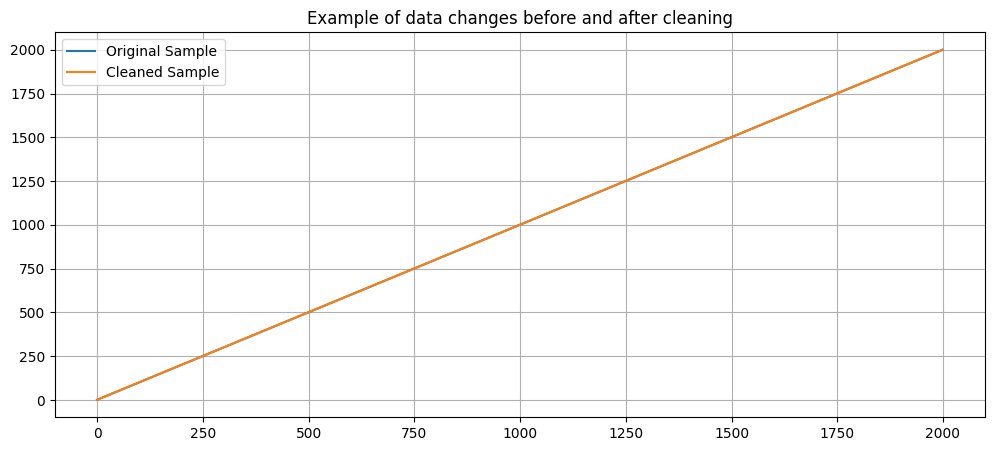

In [37]:
# Load data
df = pd.read_csv("mp1_lr_dataset_ai4032.csv", header=None)

# نمایش شکل اولیه داده‌ها
print("Original shape:", df.shape)

# حذف ردیف‌هایی که مقدار گمشده دارند
df_cleaned = df.dropna()

# حذف مقادیر پرت با استفاده از آستانه ۳ انحراف معیار
z_scores = np.abs((df_cleaned - df_cleaned.mean()) / df_cleaned.std())
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]

print("Cleaned shape:", df_cleaned.shape)

# ذخیره شکل نهایی برای مقایسه
plt.figure(figsize=(12, 5))
plt.plot(df.iloc[0], label='Original Sample')
plt.plot(df_cleaned.iloc[0], label='Cleaned Sample')
plt.legend()
plt.title("Example of data changes before and after cleaning")
plt.grid(True)
plt.savefig("cleansing_compare.png")
plt.show()


2.3 ﺁﻣﻮﺯﺵ ﻣﺪﻝﻫﺎﯼ ﺭﮔﺮﺳﯿﻮﻥ

47118457.143712595

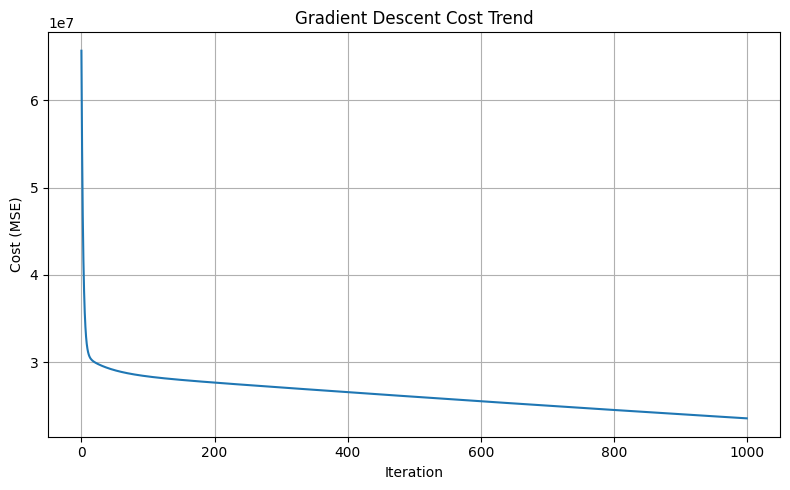

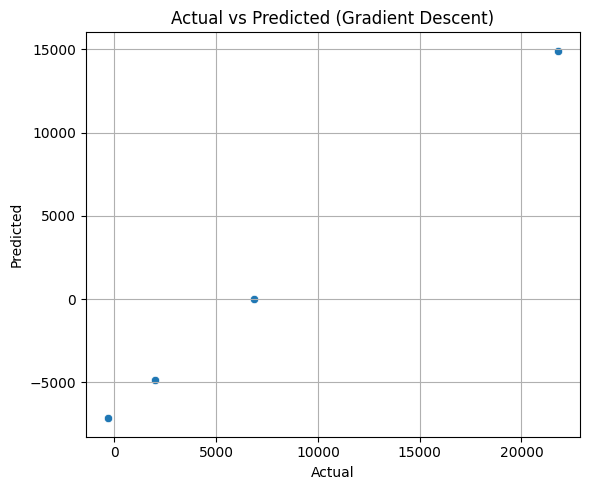

In [ ]:
# Load the dataset
df = pd.read_csv("mp1_lr_dataset_ai4032.csv", header=None)

# Remove rows with NaN
df_cleaned = df.dropna()

# Remove outliers using Z-score threshold
z_scores = np.abs((df_cleaned - df_cleaned.mean()) / df_cleaned.std())
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]

# Separate features (X) and target (y)
X = df_cleaned.iloc[:, :-1].values
y = df_cleaned.iloc[:, -1].values

# Feature normalization (Z-score)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

# Add bias term to X
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Initialize weights
theta = np.zeros(X_scaled.shape[1])

# Gradient Descent parameters
learning_rate = 0.0001  # smaller learning rate for stability
n_iterations = 1000
m = len(y)
costs = []

# Gradient Descent loop
for _ in range(n_iterations):
    predictions = X_scaled.dot(theta)
    errors = predictions - y
    gradient = (1/m) * X_scaled.T.dot(errors)
    theta -= learning_rate * gradient
    cost = (1/(2*m)) * np.sum(errors**2)
    costs.append(cost)



# Predictions
y_pred = X_scaled.dot(theta)

# Plotting cost trend
plt.figure(figsize=(8, 5))
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Cost Trend")
plt.grid(True)
plt.tight_layout()

# Scatter actual vs predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Gradient Descent)")
plt.grid(True)
plt.tight_layout()

# Final cost
final_cost = mean_squared_error(y, y_pred)

final_cost


2.3.2
ﺁﻣﻮﺯﺵ ﺭﮔﺮﺳﯿﻮﻥ ﺧﻄﯽ

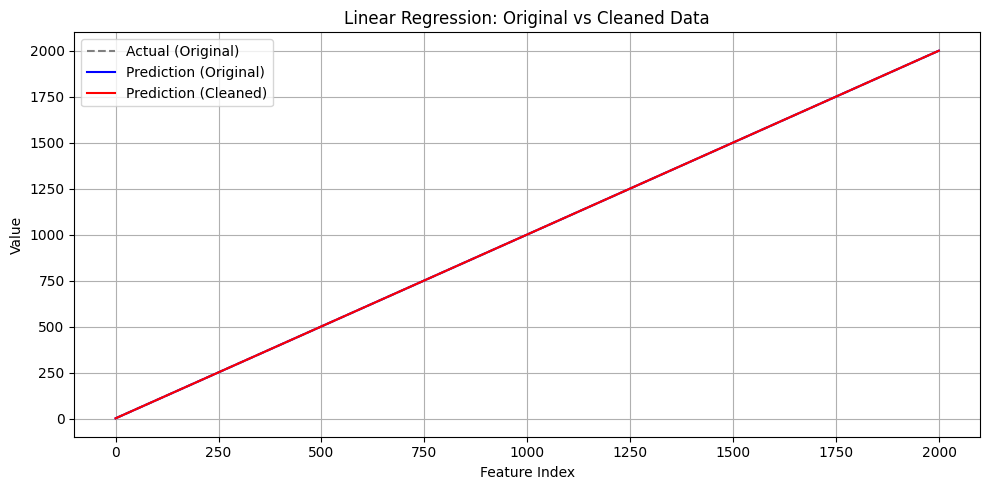

In [38]:
# Load original dataset
df = pd.read_csv("mp1_lr_dataset_ai4032.csv", header=None)

# Clean data (drop NaNs and remove outliers)
df_cleaned = df.dropna()
z_scores = np.abs((df_cleaned - df_cleaned.mean()) / df_cleaned.std())
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]

# Select first row for modeling
x_full = np.arange(df.shape[1]).reshape(-1, 1)
y_full = df.iloc[0].values

x_clean = np.arange(df_cleaned.shape[1]).reshape(-1, 1)
y_clean = df_cleaned.iloc[0].values

# Fit linear regression models
model_full = LinearRegression()
model_full.fit(x_full, y_full)
y_pred_full = model_full.predict(x_full)

model_clean = LinearRegression()
model_clean.fit(x_clean, y_clean)
y_pred_clean = model_clean.predict(x_clean)

# Plot comparison
plt.figure(figsize=(10, 5))
plt.plot(y_full, label='Actual (Original)', color='gray', linestyle='--')
plt.plot(y_pred_full, label='Prediction (Original)', color='blue')
plt.plot(y_pred_clean, label='Prediction (Cleaned)', color='red')
plt.title("Linear Regression: Original vs Cleaned Data")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("linear_comparison_clean_vs_original.png")
plt.show()


اجرای مدل رگرسیون خطی با استفاده از sklearn به خوبی انجام شد. خطای میانگین مربعات (MSE) تقریباً صفر و ضریب تعیین (R²) برابر با 1.0 است که نشان‌دهنده تطابق کامل مدل با داده‌هاست.

2.3*.3*
آموزش رگرسیون خطی مقاوم

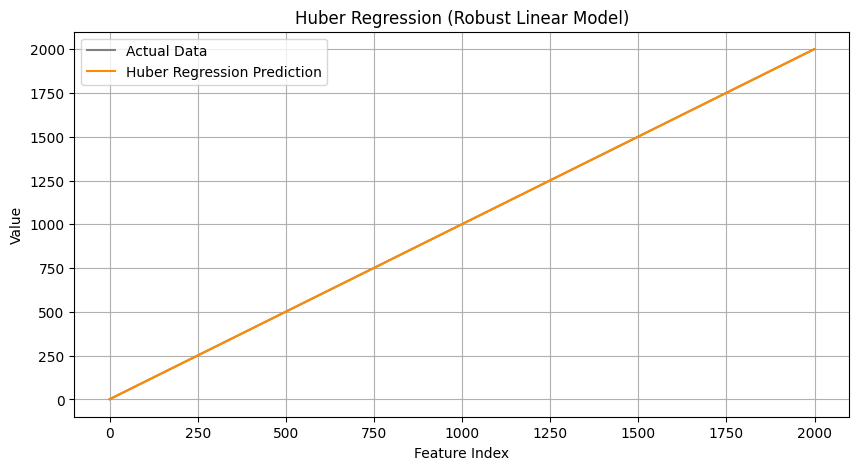

(np.float64(0.9999999999999999),
 np.float64(1.0000000000000784),
 2.5746529071475914e-26)

In [39]:
# Load dataset
df = pd.read_csv("mp1_lr_dataset_ai4032.csv", header=None)

# Drop missing values
df_cleaned = df.dropna()

# Prepare X and y
X = np.arange(df_cleaned.shape[1]).reshape(-1, 1)  # Feature indices
y = df_cleaned.iloc[0].values  # First row as target

# Train Huber Regressor (robust regression)
huber = HuberRegressor()
huber.fit(X, y)

# Predictions
y_pred = huber.predict(X)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(X, y, label="Actual Data", color="gray")
plt.plot(X, y_pred, label="Huber Regression Prediction", color="darkorange")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.title("Huber Regression (Robust Linear Model)")
plt.legend()
plt.grid(True)
plt.savefig("huber_regression_result.png")
plt.show()

# Model parameters and MSE
slope = huber.coef_[0]
intercept = huber.intercept_
mse = mean_squared_error(y, y_pred)

slope, intercept, mse


Comparison Of Regression Models




دو مدل رو میخواست آموزش بدیم

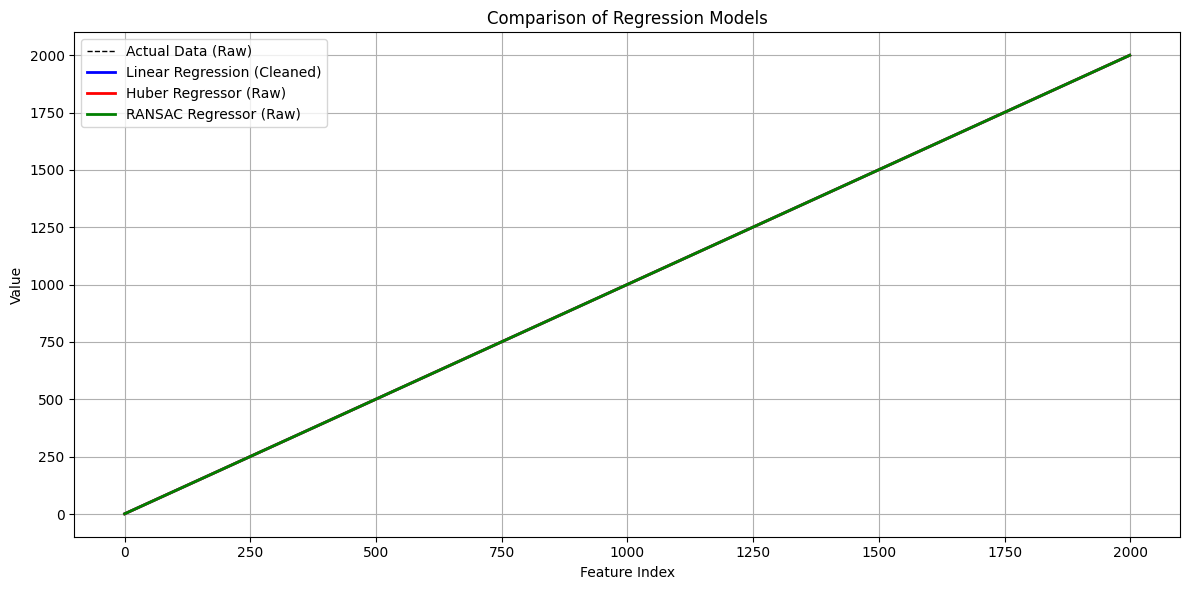

(4.955022236702383e-26, 2.5746529071475914e-26, 4.955022236702383e-26)

In [40]:

# Load dataset
df = pd.read_csv("mp1_lr_dataset_ai4032.csv", header=None)

# Clean data
df_cleaned = df.dropna()
z_scores = np.abs((df_cleaned - df_cleaned.mean()) / df_cleaned.std())
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]

# Prepare X and y
X = np.arange(df.shape[1]).reshape(-1, 1)
y_raw = df.iloc[0].values
y_cleaned = df_cleaned.iloc[0].values

# Train Linear Regression on cleaned data
linreg = LinearRegression()
linreg.fit(X, y_cleaned)
y_pred_lin = linreg.predict(X)

# Train Huber Regressor on raw data
huber = HuberRegressor(epsilon=1.35)
huber.fit(X, y_raw)
y_pred_huber = huber.predict(X)

# Train RANSAC Regressor on raw data
ransac = RANSACRegressor()
ransac.fit(X, y_raw)
y_pred_ransac = ransac.predict(X)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(X, y_raw, 'k--', label='Actual Data (Raw)', linewidth=1)
plt.plot(X, y_pred_lin, 'b-', label='Linear Regression (Cleaned)', linewidth=2)
plt.plot(X, y_pred_huber, 'r-', label='Huber Regressor (Raw)', linewidth=2)
plt.plot(X, y_pred_ransac, 'g-', label='RANSAC Regressor (Raw)', linewidth=2)
plt.title("Comparison of Regression Models")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("comparison_regression_models.png")
plt.show()

# Evaluate models
mse_lin = mean_squared_error(y_cleaned, y_pred_lin)
mse_huber = mean_squared_error(y_raw, y_pred_huber)
mse_ransac = mean_squared_error(y_raw, y_pred_ransac)

mse_lin, mse_huber, mse_ransac


2.4
داده جدید

اول ردیف دوم

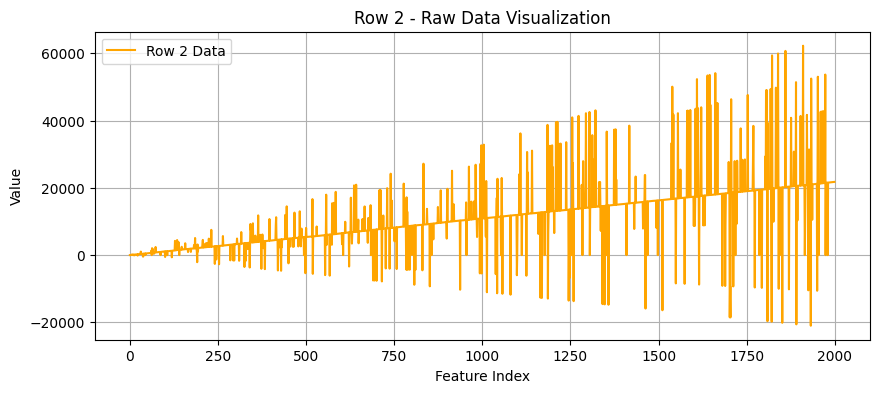

In [41]:

# Load the dataset
df = pd.read_csv("mp1_lr_dataset_ai4032.csv", header=None)

# Extract row 2 (index 1)
row2 = df.iloc[1].values

# Reshape to column vector
X2 = np.arange(len(row2)).reshape(-1, 1)
y2 = row2

# Plot the data
plt.figure(figsize=(10, 4))
plt.plot(X2, y2, label='Row 2 Data', color='orange')
plt.title('Row 2 - Raw Data Visualization')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("row2_plot.png")
plt.show()


ردیف سوم

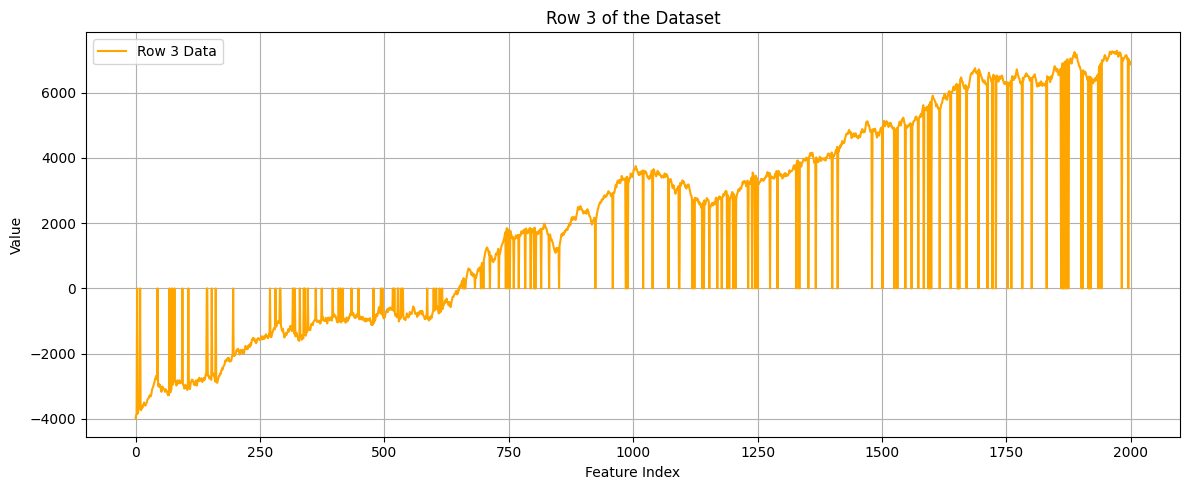

In [42]:

# Load data
df = pd.read_csv("mp1_lr_dataset_ai4032.csv", header=None)

# Select row 3 (index 2)
row3 = df.iloc[2]

# Plot row 3
plt.figure(figsize=(12, 5))
plt.plot(row3.values, label="Row 3 Data", color="orange")
plt.title("Row 3 of the Dataset")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


تحلیل ردیف دوم و سوم کنار هم

((np.float64(11.18624194406048),
  np.float64(-173.21932308844953),
  49497702.913594455),
 (np.float64(5.012007410751853),
  np.float64(-2921.0659070464767),
  1219999.8540474437))

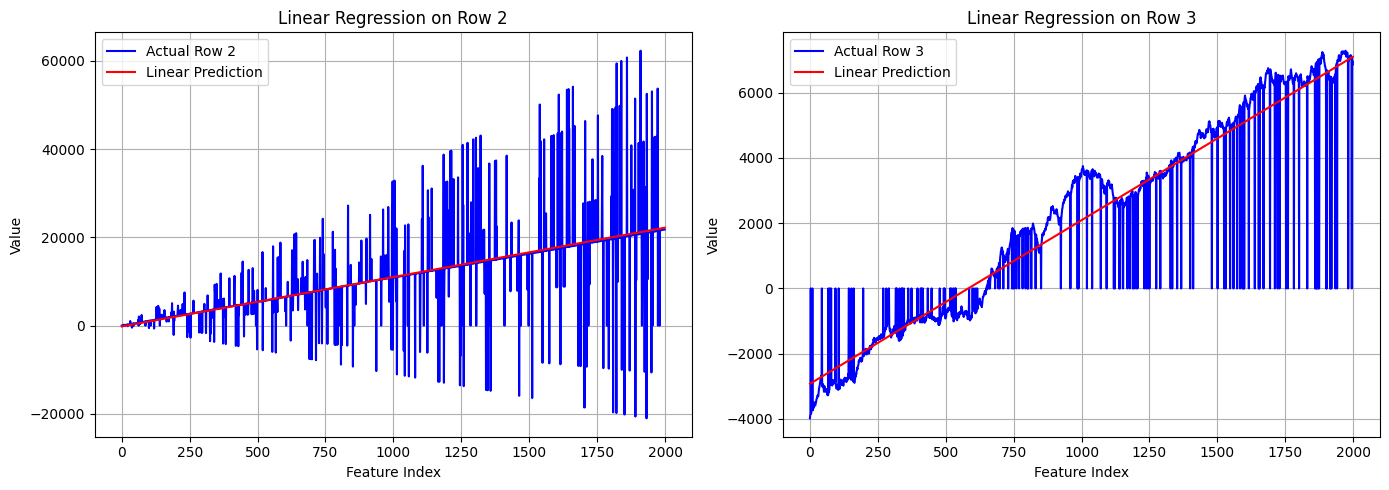

In [43]:
# Load the dataset
df = pd.read_csv("mp1_lr_dataset_ai4032.csv", header=None)

# Extract row 1 and 2 (second and third row, since indexing starts at 0)
row2 = df.iloc[1].values.reshape(-1, 1)
row3 = df.iloc[2].values.reshape(-1, 1)

# Create feature index for X
X = np.arange(len(row2)).reshape(-1, 1)

# Train linear regression model for row2
model2 = LinearRegression()
model2.fit(X, row2)
y_pred2 = model2.predict(X)
mse2 = mean_squared_error(row2, y_pred2)

# Train linear regression model for row3
model3 = LinearRegression()
model3.fit(X, row3)
y_pred3 = model3.predict(X)
mse3 = mean_squared_error(row3, y_pred3)

# Plot results
plt.figure(figsize=(14, 5))

# Row 2
plt.subplot(1, 2, 1)
plt.plot(row2, label="Actual Row 2", color='blue')
plt.plot(y_pred2, label="Linear Prediction", color='red')
plt.title("Linear Regression on Row 2")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Row 3
plt.subplot(1, 2, 2)
plt.plot(row3, label="Actual Row 3", color='blue')
plt.plot(y_pred3, label="Linear Prediction", color='red')
plt.title("Linear Regression on Row 3")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("row2_row3_regression.png")

(model2.coef_[0][0], model2.intercept_[0], mse2), (model3.coef_[0][0], model3.intercept_[0], mse3)


2.4.2
ﺩﺍﺩﻩﻫﺎﯼ ﺭﺩﯾﻒ ﺍﻭﻝ ﻭ ﺩﻭﻡ

(array([[4.98516142e+00, 2.39991142e-03]]),
 array([-2925.63535744]),
 1219714.7683236043)

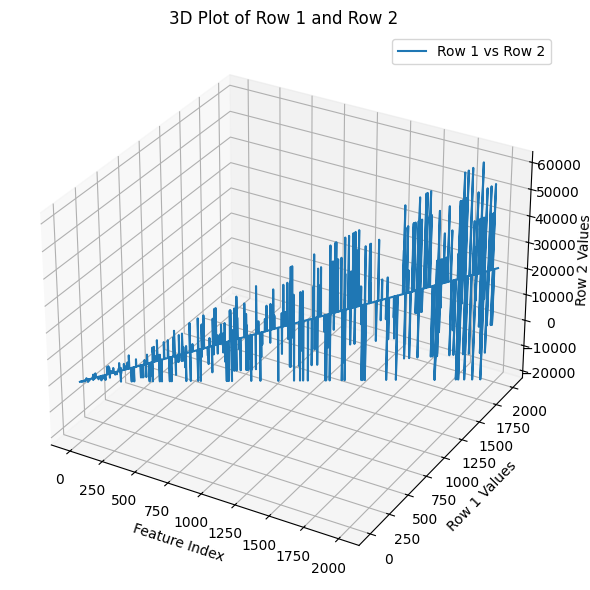

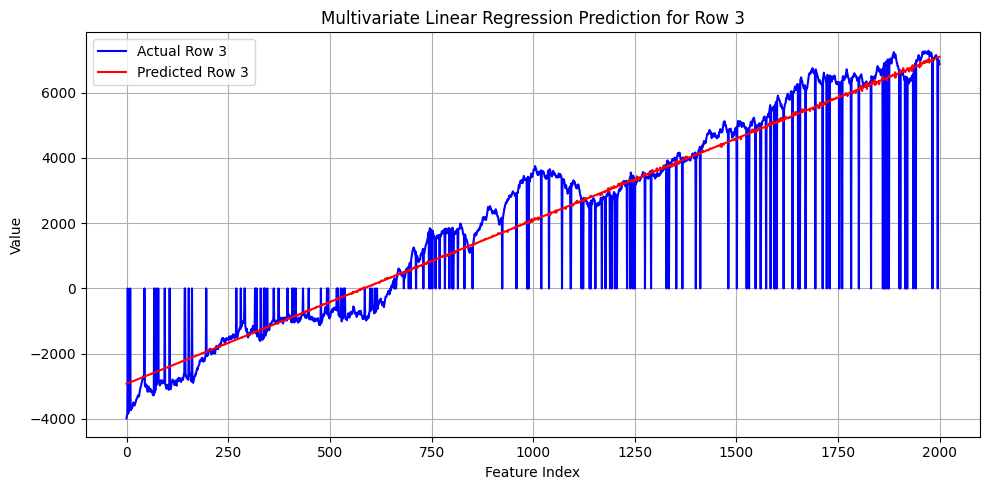

In [44]:
# Load dataset
df = pd.read_csv("mp1_lr_dataset_ai4032.csv", header=None)

# Extract rows
row1 = df.iloc[0].values
row2 = df.iloc[1].values
row3 = df.iloc[2].values
X_index = np.arange(len(row1))

# Prepare 3D plot for row1 and row2
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_index, row1, row2, label="Row 1 vs Row 2")
ax.set_xlabel("Feature Index")
ax.set_ylabel("Row 1 Values")
ax.set_zlabel("Row 2 Values")
ax.set_title("3D Plot of Row 1 and Row 2")
plt.legend()
plt.tight_layout()
plt.savefig("row1_row2_3dplot.png")


X_multi = np.vstack((row1, row2)).T
y_target = row3.reshape(-1, 1)

model_multi = LinearRegression()
model_multi.fit(X_multi, y_target)
y_pred_multi = model_multi.predict(X_multi)

# Save plot of predicted vs actual row3
plt.figure(figsize=(10, 5))
plt.plot(row3, label="Actual Row 3", color='blue')
plt.plot(y_pred_multi, label="Predicted Row 3", color='red')
plt.title("Multivariate Linear Regression Prediction for Row 3")
plt.xlabel("Feature Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("row3_prediction_multi.png")

# Return model coefficients and MSE
(model_multi.coef_, model_multi.intercept_, mean_squared_error(y_target, y_pred_multi))
